In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mtb
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans


## Loading Data

In [145]:
df = pd.read_excel("perfume_data.xlsx",sheet_name="Sayfa1",header=None)
# df=df.set_index(0).T.reset_index(drop=True)
df.head(2)


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,ajayeb,64558,64556,64543,64543,64541,64543,64543,64541,64541,...,64541,64541,64541,64541,64541,64541,64528,64528,64528,64528
1,ajmal,60502,60489,61485,60487,61485,61513,60515,60500,60500,...,60472,60472,60461,61470,60487,60487,61485,60487,60472,60472


In [146]:
x_df = df[df.columns[1:]]
temp = x_df.to_numpy()

data = []
for i in range(len(temp)):
    for j in range(28):
        data.append(temp[i][j])

data_frame = pd.DataFrame(data,columns=["Value"])

data_frame.head(2)

,Value
0,64558
1,64556


## Plotting Perfume Scores
In above block, the whole data (intefer perfume scores of every perfume) is converted into an array. Now, this is just a general data. We don't know about the clusters it had before. Now, we'll make 20 clusters with the KMeans Clustering

This is a 1D data. We can plot it on a line. Instead, a fix y-value is used for each score (x-value)

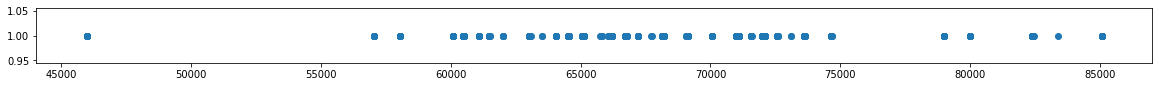

In [147]:
plt.figure(figsize=(20,1))
plt.scatter(data_frame['Value'],np.ones(len(data_frame)))

## KMeans Clustering

In [148]:
model = KMeans(n_clusters=20,random_state=0)
model

KMeans(n_clusters=20, random_state=0)

In [149]:
model.fit_predict(data_frame);

In [150]:
clusters = model.labels_
data_frame["cluster"] = clusters
data_frame[67:68]

,Value,cluster
67,58043,7


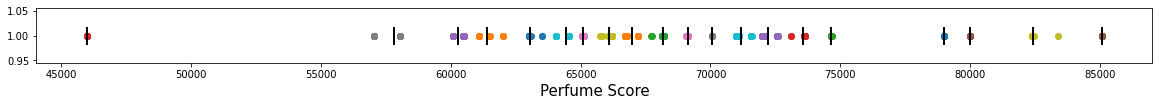

In [157]:
plt.figure(figsize=(20,1))

for i in range(model.n_clusters):
    temp_df = data_frame[data_frame.cluster==i]
    plt.scatter(temp_df.Value,np.ones(len(temp_df)),label=i)
plt.scatter(model.cluster_centers_,np.ones(len(model.cluster_centers_)),
            marker="|",s=350,color='black',linewidths=2)

# plt.legend()
plt.xlabel("Perfume Score",fontsize=15)
plt.show()


In [158]:
# model.cluster_centers_

## Actual Clusters

In [172]:
df=df.set_index(0).T.reset_index(drop=True)
# comment this after executing one time.
# the actual data had perfumes as rows and their scores infront of them
# the above line takes transpose and rows becomes columns 

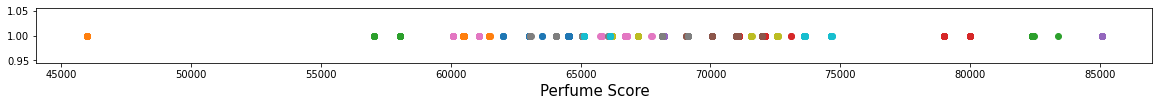

In [166]:
features = list(df.columns)
# plt.figure(figsize=(20,15))
plt.figure(figsize=(20,1))
for feature in features:
    plt.scatter(x=df[feature],y=np.ones(len(df)),label=feature)
# plt.legend()
plt.xlabel("Perfume Score",fontsize=15)
plt.show()

## Elbow Method
To go with this, put k = 4 in Kmeans constructor insteasd of 20. I have used 20 clusters because the actual dataset had 20 different perfumes.

In [169]:
k_values = range(1,30)
errors = []
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(data_frame)
    errors.append(model.inertia_)

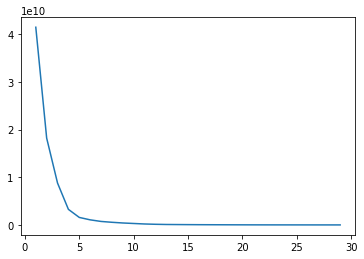

In [170]:
plt.plot(k_values,errors)